# Stats and Analysis Notebook

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp
import sqlite3
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter

Read clean data

In [2]:
gross_budget=pd.read_csv('../Data/clean_data/gross_budget.csv',index_col=0)

In [3]:
movie_genre_profit=pd.read_csv('../Data/clean_data/gross_budget_genre.csv',index_col=0)

In [4]:
gross_budget.head()

,title,foreign_gross,release_date,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
0,Toy Story 3,652000000,2010-06-18,200000000,415004880,1068879522,868879522,434.439761
1,Inception,535700000,2010-07-16,160000000,292576195,835524642,675524642,422.202901
2,Shrek Forever After,513900000,2010-05-21,165000000,238736787,756244673,591244673,358.330105
3,The Twilight Saga: Eclipse,398000000,2010-06-30,68000000,300531751,706102828,638102828,938.386512
4,Iron Man 2,311500000,2010-05-07,170000000,312433331,621156389,451156389,265.386111


In [5]:
movie_genre_profit.head()

,title_x,foreign_gross,release_date_x,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date_y,release_month
0,Toy Story 3,652000000,2010-06-18,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,2010-06-18,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,2010-06-18,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,2010-07-16,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,2010-07-16,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


## Analysis and Business Recommendations

### First Busines Becommendation
#### ROI
Return on investment, or ROI, was explored as it seemed the most logical metric to analyze to assess the financial performance of the initial genre. Since there is a significant difference in mean ROI among genres, it indicates that these genres, on average, have a more favorable return on investment compared to other genres.

We would consider allocating resources and focusing marketing efforts on producing and promoting horror and thriller movies. These genres have shown, on average, higher returns on investment, suggesting a potential business opportunity.

In [6]:
movie_genre_profit.head()

,title_x,foreign_gross,release_date_x,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date_y,release_month
0,Toy Story 3,652000000,2010-06-18,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,2010-06-18,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,2010-06-18,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,2010-07-16,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,2010-07-16,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


In [7]:
corr=movie_genre_profit[['production_budget','net_profit' , 'domestic_gross_y','foreign_gross','worldwide_gross']].corr()

In [8]:
corr

,production_budget,net_profit,domestic_gross_y,foreign_gross,worldwide_gross
production_budget,1.000000,0.654033,0.699290,0.760902,0.777736
net_profit,0.654033,1.000000,0.935265,0.873253,0.984173
domestic_gross_y,0.699290,0.935265,1.000000,0.808757,0.940983
foreign_gross,0.760902,0.873253,0.808757,1.000000,0.903887
worldwide_gross,0.777736,0.984173,0.940983,0.903887,1.000000


In [9]:
#group by generes for mean ROI
genres_group_ROI=movie_genre_profit.groupby('genres')['ROI'].mean()
genres_group_ROI.sort_values(ascending=False)

genres
Horror         1266.272146
Mystery        1196.900004
Thriller        722.538868
Sport           370.518995
Documentary     339.749306
Romance         331.405708
Music           308.979671
Sci-Fi          304.973267
Animation       288.559933
Comedy          275.843857
Biography       257.000103
Drama           245.578295
Adventure       237.396481
Fantasy         231.195001
Action          197.524001
Family          181.243727
History         176.870635
Crime           142.333966
Musical         137.381944
Western          84.068855
War              57.951986
Name: ROI, dtype: float64

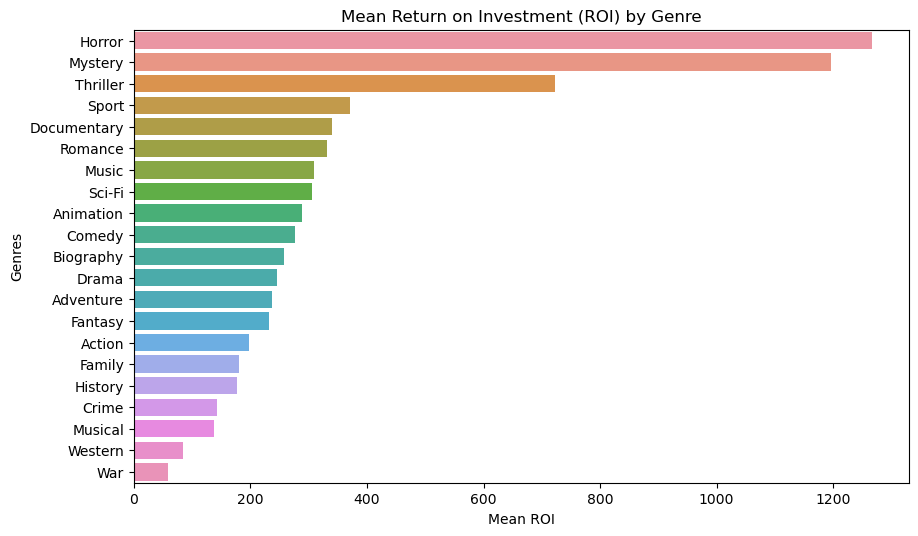

In [10]:
#plotting a simple bar graph to show case the mean ROI accross the genres
genres_group_ROI = genres_group_ROI.sort_values(ascending=False)
plt.figure(figsize=(10, 6),dpi=100)
sns.barplot(x=genres_group_ROI.values, y=genres_group_ROI.index)

plt.title('Mean Return on Investment (ROI) by Genre')
plt.xlabel('Mean ROI')
plt.ylabel('Genres')

plt.show()

#### Hypothesis testing to check whether their is a siginificant difference in mean ROI among genres

- Null hypothesis: There is no significant difference in mean ROI among genres.
- Alternative hypothesis : There is a significant difference in mean ROI among genres.

In [11]:
#used ANOVA for testing
ROI_by_genre = [movie_genre_profit[movie_genre_profit['genres'] == genre]['ROI'] for genre in movie_genre_profit['genres'].unique()]

f_stats, p_value = f_oneway(*ROI_by_genre)
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ROI among genres.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean ROI among genres.")

4.677511877963311e-14
Reject the null hypothesis. There is a significant difference in mean ROI among genres.


The null hypothesis was reject since there was a significant difference in mean ROI among genres: Horror, Mystery, & Thriller took the top spots.

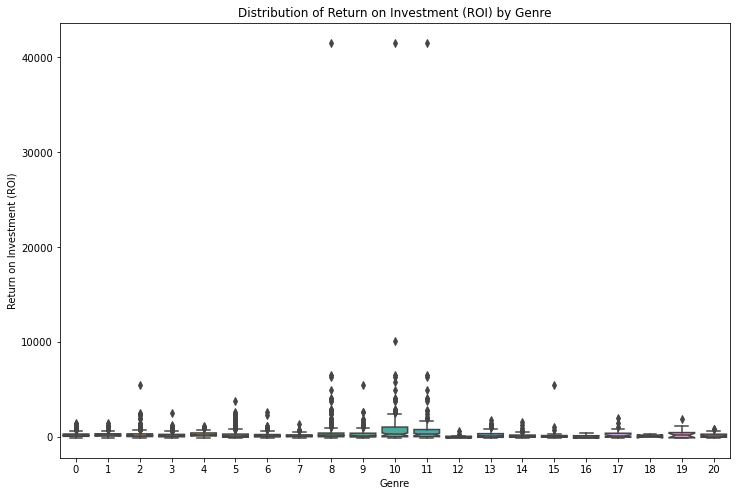

In [12]:
#using box plot showing the distribution of return on investment by genre
plt.figure(figsize=(12, 8))

sns.boxplot(data=ROI_by_genre, notch=True)
plt.title('Distribution of Return on Investment (ROI) by Genre')
plt.xlabel('Genre')
plt.ylabel('Return on Investment (ROI)')
plt.show()

### Second Business Recommendation

#### Mean Profit per Month

Because horror movies tend to have the highest ROI, we looked at the mean profit per month for the first genre we will focus on.

This graph shows that typically horror films made the most when released in August or September, not October like we had originally surmised. Perhaps people are looking to horror movies for some motivation before Halloween (costumes, decorations, etc).

In [13]:
#filtered only horror movie genres
profit_month_horror=movie_genre_profit.loc[movie_genre_profit.genres=='Horror']
profit_month_horror.head()

,title_x,foreign_gross,release_date_x,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date_y,release_month
16,Resident Evil: Afterlife,240100000,2010-09-10,57500000,60128566,295874190,238374190,414.563809,tt1220634,96.0,Horror,5.9,153270.0,0.667,2010-09-10,September
32,Paranormal Activity 2,92800000,2010-10-20,3000000,84752907,177512032,174512032,5817.067733,tt1536044,91.0,Horror,5.7,93122.0,8.163,2010-10-21,October
41,The Wolfman,77800000,2010-02-12,150000000,62189884,142634358,-7365642,-4.910428,tt0780653,103.0,Horror,5.8,97873.0,14.030,2010-02-12,February
58,Piranha 3D,58200000,2010-08-20,24000000,25003155,83660160,59660160,248.584000,tt0464154,88.0,Horror,5.4,81327.0,11.302,2010-08-20,August
67,The Last Exorcism,26700000,2010-08-27,1800000,41034350,70165900,68365900,3798.105556,tt1320244,87.0,Horror,5.6,45815.0,9.350,2010-08-27,August


In [14]:
#provides the average net profit for horror movies grouped by the month of release
profit_month_horror.groupby('release_month')['net_profit'].mean()

release_month
April        3.223515e+07
August       9.077685e+07
December     2.639705e+07
February     5.171022e+07
January      7.719285e+07
July         7.946608e+07
June         8.192604e+07
March        4.000593e+07
May          5.491234e+07
November     2.515746e+07
October      7.670088e+07
September    8.316058e+07
Name: net_profit, dtype: float64

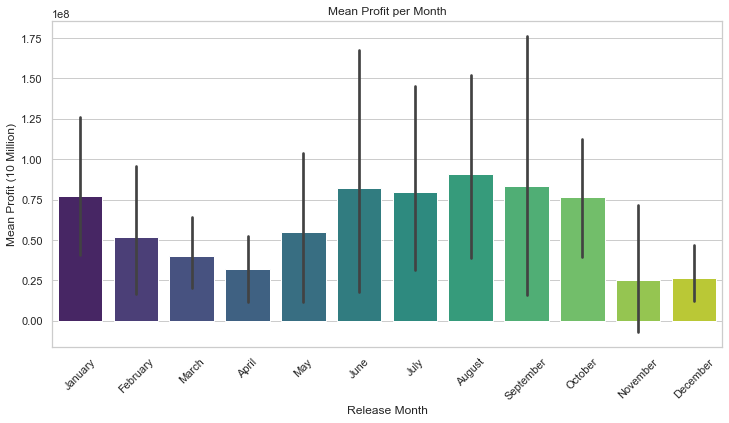

In [15]:
# barplot graph mean profit across each months
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
sns.barplot(x=profit_month_horror.release_month, y=profit_month_horror.net_profit, order=month_order, palette='viridis')
plt.title('Mean Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit (10 Million)')
plt.show()

In [16]:

# net_by_month = [profit_month_horror[profit_month_horror['release_month'] == month]['net_profit'] for month in movie_genre_profit['release_month'].unique()]

# f_stats, p_value = f_oneway(*net_by_month)
# print(p_value)
# alpha = 0.05
# if p_value < alpha:
#     print("Reject the null hypothesis. There is a significant difference in mean net profit among genres.")
# else:
#     print("Fail to reject the null hypothesis. There is no significant difference in mean net profit among genres.")

In [17]:
# plt.figure(figsize=(12, 8))
# for month, net_values in zip(profit_month_horror['release_month'].unique(), net_by_month):
#     sns.kdeplot(net_values, label=month, fill=True, common_norm=False)

# plt.title('Distribution of Net Profit by Month')
# plt.xlabel('Net Profit')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

### Third Business Recommendation

#### Budget vs. Worldwide Gross

We also attempted to find a correlation between worldwide gross and production budget. Our logic behind this was to see if the amount of money spent on production had any relationship with worldwide gross income.

Mean Absolute Error: 25002071.71082999
Mean Squared Error: 1341775744813061.8
Root Mean Squared Error: 36630257.23105233


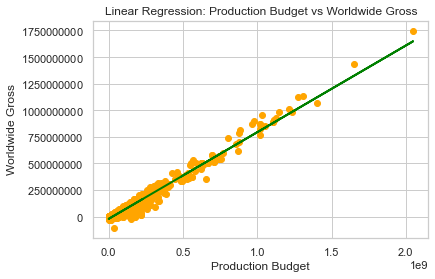

In [18]:
features = movie_genre_profit[['worldwide_gross']]
target = movie_genre_profit['net_profit'] 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(X_test, y_test, color='orange', label='Actual')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Linear Regression Model')


formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Linear Regression: Production Budget vs Worldwide Gross')
plt.show()


In the correlation matrix we set up between the two variables, the correlation coefficient between these two variables was .74. This indicated a strong to moderate relationship between the two variables and was further corroborated by the R2 value of 0.61 and accounts for the variation around the regression line.

From the variation around the line, it is hard to say definitively that the more a company spends on production, the greater the worldwide gross income. To find a production budget range that made a decent worldwide gross income, we looked at the lower 25th percentile in spending. To generate a spending range leading to the best projected worldwide gross income.

### As A Next Step 

- First focus will be on creating & releasing horror films, due to typically low production costs and relatively high ROI
- Action would be the next genre to focus on, since action tends to have the highest mean profit per month

In [19]:
#filtered only horror movie genres
profit_month_action=movie_genre_profit.loc[movie_genre_profit.genres=='Action']
profit_month_horror.head()

,title_x,foreign_gross,release_date_x,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date_y,release_month
16,Resident Evil: Afterlife,240100000,2010-09-10,57500000,60128566,295874190,238374190,414.563809,tt1220634,96.0,Horror,5.9,153270.0,0.667,2010-09-10,September
32,Paranormal Activity 2,92800000,2010-10-20,3000000,84752907,177512032,174512032,5817.067733,tt1536044,91.0,Horror,5.7,93122.0,8.163,2010-10-21,October
41,The Wolfman,77800000,2010-02-12,150000000,62189884,142634358,-7365642,-4.910428,tt0780653,103.0,Horror,5.8,97873.0,14.030,2010-02-12,February
58,Piranha 3D,58200000,2010-08-20,24000000,25003155,83660160,59660160,248.584000,tt0464154,88.0,Horror,5.4,81327.0,11.302,2010-08-20,August
67,The Last Exorcism,26700000,2010-08-27,1800000,41034350,70165900,68365900,3798.105556,tt1320244,87.0,Horror,5.6,45815.0,9.350,2010-08-27,August


In [20]:
#provides the average net profit for horror movies grouped by the month of release
profit_month_action.groupby('release_month')['net_profit'].mean()

release_month
April        2.791275e+08
August       1.026015e+08
December     2.340145e+08
February     1.366136e+08
January      5.655213e+07
July         2.338868e+08
June         3.055178e+08
March        1.520545e+08
May          3.396517e+08
November     2.527312e+08
October      9.189051e+07
September    7.877537e+07
Name: net_profit, dtype: float64

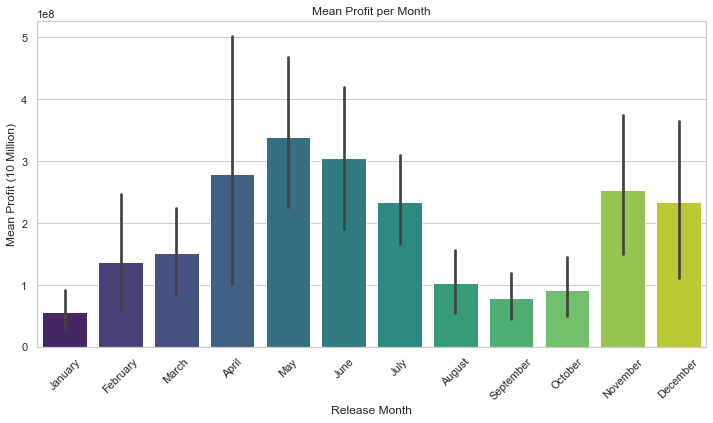

In [21]:
#bar plot to show case the best release time for action movies
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
sns.barplot(x=profit_month_action.release_month, y=profit_month_action.net_profit, order=month_order, palette='viridis')
plt.title('Mean Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit (10 Million)')
plt.show()

- Maximize the profitability: May or June would be the ideal months for release: potentially May and June have the highest mean profits since people are on vacation or students are no longer in school so they have more time for leisure activities. November & December could be another good time to release the movie as well, since people may be on vacation or watch more movies around the holidays
- It should be recognized that action films can entail higher risks, stemming from the elevated budget invested in the production
- Production budget: keep the budget somewhere in between $3-9.5M range
- Further analysis on which genres will perform well in the foreign market